<a href="https://colab.research.google.com/github/Animichael/ML_KNN_Model_customer_Behaviour_Prediction/blob/main/Customers_Behaviour_Prediction_Using_KNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The aim of this project is to develop a machine learning model to predict if a particular customer will purchase a product or not using K Nearest Neighbour Algorithm

In [45]:
# To achieve the goal of this project, these python libraries will be imported
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
import pickle


**Why we need these python libraries**

1. Pandas: Pandas is a Python library that provides data structures and functions needed to efficiently manipulate and analyze structured data, primarily in the form of dataframes, facilitating tasks such as data cleaning, exploration, and transformation.

2. Numpy: Numpy is a Python library for numerical operations, enabling efficient array computations and mathematical functions on large datasets.

3. Seaborn: Seaborn is a python library used for data visualization.

4. Matplotlib: This is also a data visualiation tool. its allows for creation of different kinds of plots including heatmaps

5. train_test_split: it's used for splitting a dataset into training and testing sets for machine learning model training and evaluation.

6. accuracy_score: in data science measures the accuracy of classification models, assessing correct predictions.

7. Z_score: Used when dealing with outliers

8. StandardScaler: used for feature scalling

9. KNeighborsClassifier: This is the machine learning algorithm used for the classification

10. cross_val_score, KFold: For carrying out cross validation

11. pickle: For data serializing and deserializing of python objects

,

In [2]:
# importing the dataset for this project
df = pd.read_csv('/content/purchase_history.csv')

In [3]:
# Viewing the dataset by calling the variable df. This will display the first 5 rows and the last 5 rows of the entire dataset
df

,Customer ID,Gender,Age,Salary,Product ID,Price,Purchased
0,1,Female,49,61000,P01,2000,1
1,2,Male,36,30000,P02,2000,1
2,3,Female,26,81000,P02,3500,1
3,4,Female,32,74000,P01,7000,0
4,5,Female,42,56000,P01,5000,0
...,...,...,...,...,...,...,...
995,996,Male,21,73000,P02,5000,1
996,997,Male,62,54000,P01,5000,0
997,998,Female,41,20000,P03,2000,0
998,999,Male,22,29000,P03,5000,0


In [4]:
# Checking how many rows and columns are in the dataset
df.shape

(1000, 7)

The dataset has 1000 rows and 7 columns as shown above

In [5]:
#Checking for the names of the columns in the dataset
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Salary', 'Product ID', 'Price',
       'Purchased'],
      dtype='object')

Exploratory Data Analysis (EDA)



In [6]:
# Checking for missing values in each column in the dataset
df.isnull().sum()

Customer ID    0
Gender         0
Age            0
Salary         0
Product ID     0
Price          0
Purchased      0
dtype: int64

As we can see, the result shows that there in no missing values in each of the cells within the columns that make up the dataset.

In [7]:
# Let's still cross examine missing vaules by checking through the entire dataframe
df.isnull().sum().sum()

0

The result is 0. Meaning that all cells within the dataframe are filled with values

In [8]:
# check for statistical information about the dataset
df.describe()

,Customer ID,Age,Salary,Price,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.989000,58667.000000,4435.500000,0.414000
std,288.819436,13.738837,23615.372044,1847.973148,0.492795
min,1.000000,18.000000,20000.000000,2000.000000,0.000000
25%,250.750000,29.000000,38000.000000,3500.000000,0.000000
50%,500.500000,40.000000,59000.000000,5000.000000,0.000000
75%,750.250000,53.000000,80000.000000,7000.000000,1.000000
max,1000.000000,64.000000,100000.000000,7000.000000,1.000000


By using the describe() function, the count, mean, standard deviation, minimum, and maximum values for each columns are calculated. Since there are one thousand rows in the dataset, the count value returns 1000 for each column and other statistical measures are also calculated using appropriate methods.

In [9]:
# let's check for more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  1000 non-null   int64 
 1   Gender       1000 non-null   object
 2   Age          1000 non-null   int64 
 3   Salary       1000 non-null   int64 
 4   Product ID   1000 non-null   object
 5   Price        1000 non-null   int64 
 6   Purchased    1000 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 54.8+ KB


The result of using the info() function tells us the name of each columns in the dataframe with a default index numbering (0-6), each columns having 1000 rows with non-null(meaning no empty values) and the respective data type for each columns (int64 and object )

In [10]:
# Let's examine how many Male and Female customers are in the dataset

df.groupby('Gender')['Gender'].count()

Gender
Female    523
Male      477
Name: Gender, dtype: int64

The result of this analysis shows that there are 523 Female and 477 Male customers that make purchase from this store with Female gender having highest patronage. Let's visualize this using a simple countplot in seaborn

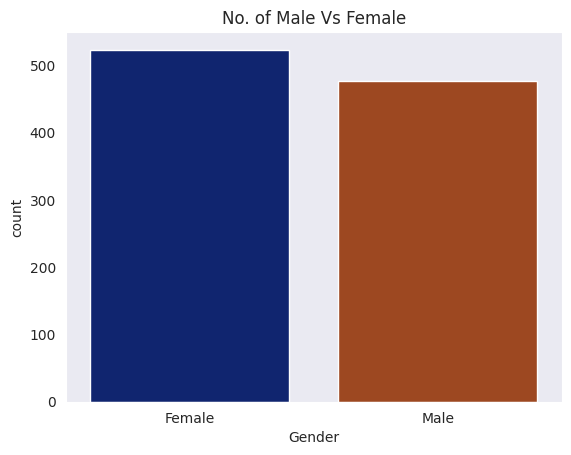

In [11]:
sns.set_style('dark')
sns.countplot(x=df['Gender'], data=df, palette='dark', hue='Gender')
plt.title('No. of Male Vs Female')
plt.show()

In [12]:
# let's check for the highest Salary and which gender earns it.
highest_salary_row = df.loc[df['Salary'].idxmax()]
highest_salary_row
highest_salary = highest_salary_row['Salary']
gender_with_highest_salary = highest_salary_row['Gender']
print(f"The highest salary is {highest_salary} and it belongs to {gender_with_highest_salary}.")


The highest salary is 100000 and it belongs to Female.


After examining the dataset, the Gender that earns the highest salary is the Female with the value of 100000. Let's visualize this using a simple boxplot

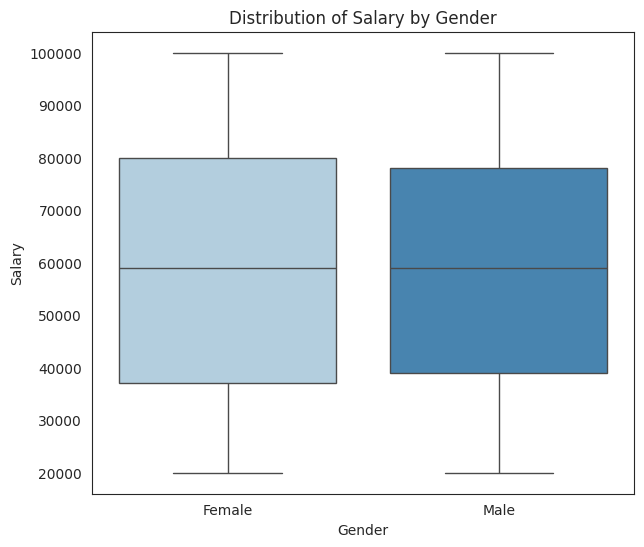

In [13]:
sns.set_style('white')
plt.figure(figsize=(7,6), dpi=100)
sns.boxplot(x='Gender', y='Salary', data=df, palette='Blues', hue='Gender')
plt.xlabel("Gender")
plt.ylabel("Salary")
plt.title("Distribution of Salary by Gender")
plt.show()

In [14]:
# Let's check which product was mostly sold using the Product ID column
df.groupby('Product ID')['Product ID'].count()

Product ID
P01    346
P02    325
P03    329
Name: Product ID, dtype: int64

The product with ID 01 is mostly purchased by the customers. Let's visualize the product purchased by gender using a countplot.

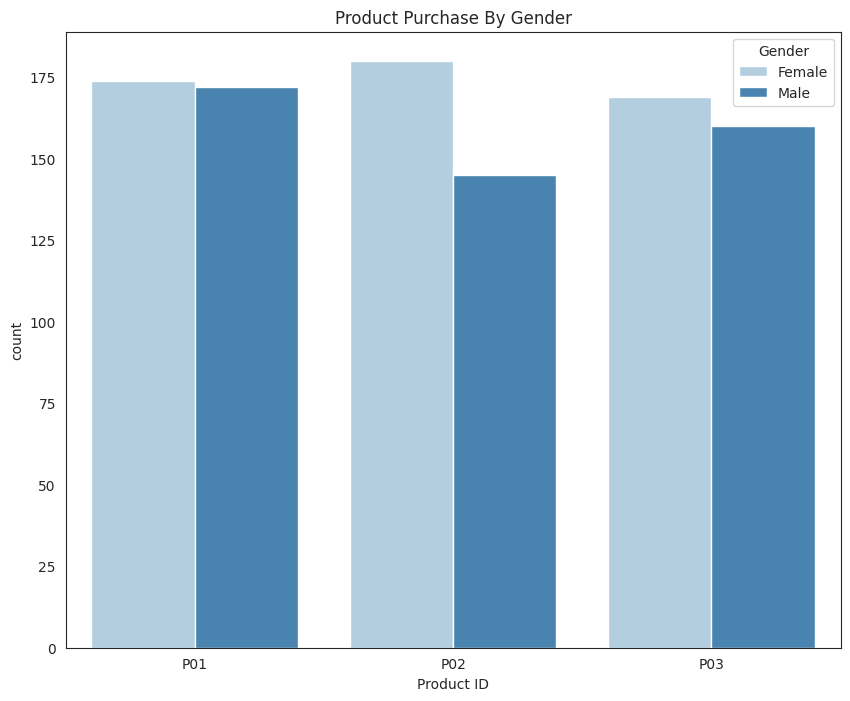

In [15]:
sns.set_style('white')
plt.figure(figsize=(10,8), dpi=100)
sns.countplot(x=df['Product ID'], data=df, hue='Gender', palette='Blues')
plt.title('Product Purchase By Gender')
plt.show()

In [16]:
# Let's check how many customers purchase from the store and the number of customers that did not purchase any item from the store
df.groupby('Purchased')['Purchased'].count()

Purchased
0    586
1    414
Name: Purchased, dtype: int64

The total number of 414 customers purchased items from the store while 586 did'nt buy any item at all. If we sum up these values(414 and 586) the result would be 1000 marching the total number of rows that exist in the dataset. We can futher visualize this result using a countplot since this feature contains categorical values.

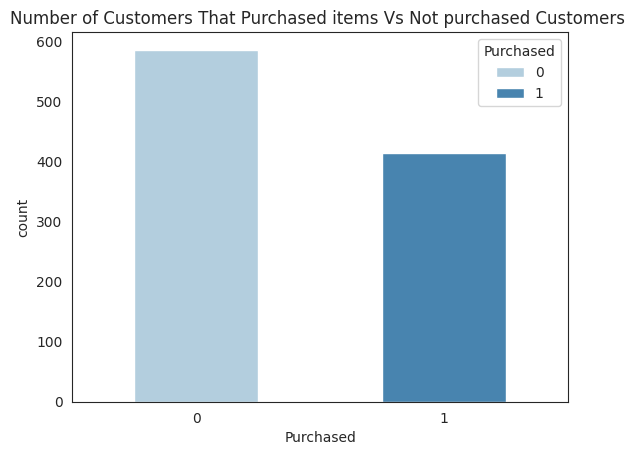

In [17]:
sns.set_style('white')
sns.countplot(x=df['Purchased'], data=df, hue='Purchased', alpha=1, palette='Blues', width=0.5)
plt.title('Number of Customers That Purchased items Vs Not purchased Customers ')
plt.show()

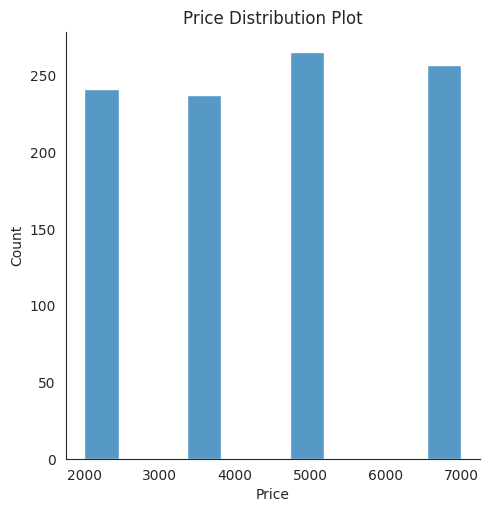

In [18]:
# Let's Visualize the price variable using a distribution plot

sns.set_style('white')
sns.displot(df['Price'], kde=False)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Price Distribution Plot")
plt.show()

**Feature Engineering (Feature Selection)**

At this stage, I'll choose the essential features to help the model make accurate predictions in order to avoid overfitting.

In [19]:
new_df =df[['Gender','Age','Salary','Price','Purchased']]
new_df

,Gender,Age,Salary,Price,Purchased
0,Female,49,61000,2000,1
1,Male,36,30000,2000,1
2,Female,26,81000,3500,1
3,Female,32,74000,7000,0
4,Female,42,56000,5000,0
...,...,...,...,...,...
995,Male,21,73000,5000,1
996,Male,62,54000,5000,0
997,Female,41,20000,2000,0
998,Male,22,29000,5000,0


**Data Preprocessing**




1. Dealing With Outliers

In [20]:
# Checking for Outlier in the Salary Column in the Dataset using the threshold of 3 and -3

z_scores = zscore(new_df['Salary'])
df_no_outliers = new_df[(z_scores < 3) & (z_scores > -3)]
df_no_outliers

,Gender,Age,Salary,Price,Purchased
0,Female,49,61000,2000,1
1,Male,36,30000,2000,1
2,Female,26,81000,3500,1
3,Female,32,74000,7000,0
4,Female,42,56000,5000,0
...,...,...,...,...,...
995,Male,21,73000,5000,1
996,Male,62,54000,5000,0
997,Female,41,20000,2000,0
998,Male,22,29000,5000,0



Zscore is one of the techniques used when dealing with outliers. After checking if there exists outliers in the salary column, the result as shown above indicates that there are no outliers within the variable. The threshold of 3 was used and the number of rows in the new dataframe named "df_no_outliers" is same as the previous dataframe "df"

2. Converting string variables to numerical Equivalent

In [21]:
# In our dataset, the variable stores categorical data Male and female in string format. We can't feed this data into the machine learning model
# we have to convert it to binary values (0 and 1).

df_encoded = pd.get_dummies(df_no_outliers['Gender'] )
df_encoded


,Female,Male
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
995,0,1
996,0,1
997,1,0
998,0,1


We have successfully converted the Gender Column that was containg Male and Female to Binary of zero's and ones. Now its importance we don't feed redundant information into our machine learning model. As we can see, the result of the conversion give the two columns i.e binary values for Male and Female. We have to deal with this to prevent the model from overfitting.

In [22]:
# We will set the drop_first() argument to True within the get_dummies() function to drop the female binary column
df_encoded = pd.get_dummies(df_no_outliers['Gender'], drop_first=True )
df_encoded

,Male
0,0
1,1
2,0
3,0
4,0
...,...
995,1
996,1
997,0
998,1


In [23]:
# Let's concatenate the encoded gender to the original dataframe
df_no_outliers=pd.concat([df_no_outliers,df_encoded], axis=1)
df_no_outliers

,Gender,Age,Salary,Price,Purchased,Male
0,Female,49,61000,2000,1,0
1,Male,36,30000,2000,1,1
2,Female,26,81000,3500,1,0
3,Female,32,74000,7000,0,0
4,Female,42,56000,5000,0,0
...,...,...,...,...,...,...
995,Male,21,73000,5000,1,1
996,Male,62,54000,5000,0,1
997,Female,41,20000,2000,0,0
998,Male,22,29000,5000,0,1


In [24]:
# Let's Drop the Gender column from the data frame and Rename the male column to gender since it now contains the gender data point
df_no_outliers.drop(['Gender'], axis=1, inplace=True)


In [25]:
# let's rename the Male series to Gender and move the column to it original position
df_no_outliers.rename(columns={'Male': 'Gender'}, inplace=True)
df_no_outliers = pd.concat([df_no_outliers['Gender'], df_no_outliers.drop('Gender', axis=1)], axis=1)
df_no_outliers


,Gender,Age,Salary,Price,Purchased
0,0,49,61000,2000,1
1,1,36,30000,2000,1
2,0,26,81000,3500,1
3,0,32,74000,7000,0
4,0,42,56000,5000,0
...,...,...,...,...,...
995,1,21,73000,5000,1
996,1,62,54000,5000,0
997,0,41,20000,2000,0
998,1,22,29000,5000,0


**Separating the Independent Variables from the target Variable**

The **independent** **variables**  are the: Gender, Age, Salary and Price. These variables would be separated and
store in the variable x as numpy array


In the other hand, the **target variable** is the purchased feature which is what we want to predict. This feature will be stored in the variable y as a numpy array.



In [26]:
x=df_no_outliers[['Gender','Age','Salary','Price']].to_numpy()
x

array([[    0,    49, 61000,  2000],
       [    1,    36, 30000,  2000],
       [    0,    26, 81000,  3500],
       ...,
       [    0,    41, 20000,  2000],
       [    1,    22, 29000,  5000],
       [    0,    49, 36000,  3500]])

In [27]:
y=df_no_outliers['Purchased'].to_numpy()
y

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

As we can see, we have successfully splitted our dataset into independent and dependent variable which are stored in x and y respectively

**Splitting Our Dataset into Training and Testing Sets**

This is one of the key concert that must be followed when working with supervised Machine learning algorithm like KNN

In [28]:
#Let's split the data into train and test data

x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2, random_state=20)

In [29]:
# Now let's print how many data points are in x_train and x_test

print( x_train.shape, x_test.shape)

(800, 4) (200, 4)


Now we can see that after splitting the dataset into train and test sets, the total numnber of data points that would be used for the model's training is (800, 4) and (200, 4) will be reserved for testing the model.

In [30]:
# Let's also print how many data points are in the y_train and y_test after the splitting

print(y_train.shape, y_test.shape)

(800,) (200,)


Since the y variable is the target variable, it returns 800 data points that would be used to train the model and 200 data points reserved to train the model.

In [31]:
# After the splitting, this means that x_train  and y_train will be fitted into the algorithm during the model's training.
# Let's print out the values in x_train and y_train

print(x_train )
print()
print(y_train)



[[    1    40 90000  5000]
 [    0    50 91000  5000]
 [    0    41 31000  2000]
 ...
 [    0    41 63000  7000]
 [    0    18 34000  2000]
 [    0    54 93000  2000]]

[1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0
 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1
 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 1
 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0
 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1
 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1
 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1
 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0
 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1
 0 1 0

**Scalling the Features**

Scalling features in machine learning is very important  because many algorithm uses gradiant distance to measure the similarities between different features. If features are not scaled properly, features with larger numeric ranges can dominate the distance measure making it difficult for the algorithm to learn from other features. Scalling helps to ensure that all the features are equally weighted and the algorithm can learn from the features equally.

In [32]:
# Now let's Scale the features
scaler = StandardScaler()
x_scaled =scaler.fit_transform(x_train)


Since we have employed the fit_tranform() method in the  StandardScaler function to scale our dependent features and the scaled result store in the variable x_scaled, let's view its contents in the next cell

In [33]:
x_scaled

array([[ 1.06458129, -0.05970252,  1.31646821,  0.30887439],
       [-0.93933644,  0.66726881,  1.35890755,  0.30887439],
       [-0.93933644,  0.01299461, -1.18745263, -1.32214547],
       ...,
       [-0.93933644,  0.01299461,  0.17060613,  1.39622096],
       [-0.93933644, -1.65903946, -1.06013462, -1.32214547],
       [-0.93933644,  0.95805735,  1.44378622, -1.32214547]])

As we can see, the result of the scaled variables looks differently from the initial values. This shows that the independent features  have been transformed to same scale therefore preventing  variables with higher numerical values from dominating the ones with lower numeric values which inturns optimize the  models performance.

**Model Building or Training**

In the project, the KNN algorithm would be used in making the prediction. KNN is used in solving a classification problem and as such, it is a supervised machine learning algorithm. KNN works by dividing dataset into two classes. Then if a new data point is added into the dataset, it checks for the class that  the new data point belongs to and then classify the data point based on the dominant class or the class with the highest number of neighbours to the new data point.


In [34]:
# Initializing the K
k=5;
knn=KNeighborsClassifier(n_neighbors=5)
# fitiing our training dataset into the model
Train_model = knn.fit(x_train, y_train)


# Making prediction with the model
model_pred=Train_model.predict(x_test)
model_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0])

The result of the model's prediction when we fit the independent variables which was stored in the variable x_test is shown above as 0 or 1. 0 means the customer will not purchase the product while 1 means the product will be purchased. However, the next step is to evaluate the model's performance.  

**Model Evaluation**

To evaluate how well the model will perform when it sees a new dataset and when deployed to production, we will use the accuracy score technique to evaluate the model performance. To achieve this, we need the scikit learn metrics class to access the accuacy score function. we have already imported this library at the beginning of this project in line 7 on the first executable cell. We will use this library to check for the model accuracy score for the train and test data

**Note**

we chose the accuarcy score metrics for the model's performance evaluation because this is a classification task.

In [35]:
accuracy = accuracy_score(y_test, model_pred)
accuracy

0.75

The accuracy of the model's prediction is 75% which is satisfactory for our usecase  because the dataset used in training the model was'nt much. In a better note, machine learning models are expected to have accuracy score of 90% and above for such model to deploy for production purpose.

**Cross Validation**

This is a technqiue used in also evaluating model's performance. Cross validation are of different categories: K-fold, Stratefied and Leave One Out cross validation. In this project, we will use the K-fold cross validation in evaluating the model's performance and print out the score.

In [36]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(knn, x, y, cv=k_fold)
# Print or analyze the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.755 0.75  0.76  0.755 0.76 ]
Mean Accuracy: 0.7559999999999999


As we can see, after using the KFold cross validation technique to evaluate the model's accuracy, the mean results gives 75%. This affirm that our accuracy score metrics was correct.

**Saving the Model and Scaler in a Pickle File Format**

Pickle is a python library for serializing and deserializing data. This is important becuase any data used for testing the model must be scalled the same way as the one used during the model's training. It allows you to save python objects to a file and reuse it later which is what we intend to in this project. The train model will be saved as a python object.

In [37]:
# storing our trained model in a file called KNN_model
with open('KNN_model.pickle', 'wb') as file:
  pickle.dump(Train_model,file)

In [38]:
# storing the scalled independent variables to a file name scaler.pickle
with open('scaler.pickle', 'wb') as file:
  pickle.dump(x_scaled,file)